# Feature Engineering

Now that I have my hypothesis testing done, I want to better identify drafted vs not drafted with some new features. These will ideally help my model when I finally get to run it.

First, to read in the necessary libraries and my cleaned data.

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [19]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
# setting format for readability
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [20]:
df = pd.read_pickle('../mod5project/pickle_files/cleaned_df')
print(df.shape)
df.head()

(5492, 122)


,PlayerName,Position,School,CombineYear,Height,Weight,_40yd,Vertical,Bench,BroadJump,_3Cone,Shuttle,Draft Team,Round,Pick,Draft Year,DraftedvNotDrafted,Defense_Games,Solo_Tackles,Assisted_Tackles,Ttl_Tackles,Loss,Sacks,Defensive_Interceptions,Def_Int_Yds,Yds_per_Int,Pick_6,Defended_Passes,Recovered_Fumbles,Rec_Fumbles_Yds,Fumbles_Returned_TD,Forced_Fumbles,Solo_TacklesperGame,Assisted_TacklesperGame,Ttl_TacklesperGame,LossperGame,SacksperGame,Defensive_InterceptionsperGame,Def_Int_YdsperGame,Pick_6perGame,Defended_PassesperGame,Recovered_FumblesperGame,Rec_Fumbles_YdsperGame,Fumbles_Returned_TDperGame,Forced_FumblesperGame,Passing_Games,Completions,Pass_Attempts,Completion_Percent,Pass_Yards,Pass_Yds_per_Attempt,Adj_Pass_Yds_per_Attempt,Pass_TDs,Pass_Interceptions,Passer_Rating,CompletionsperGame,Pass_AttemptsperGame,Pass_YardsperGame,Pass_TDsperGame,Pass_InterceptionsperGame,Rush_Rec_Games,Rush_Attempts,Rush_Yds,Rush_Yds_per_Attempt,Rush_TDs,Receptions,Rec_Yds,Rec_Yds_per_Reception,Rec_TDs,Plays_from_Scrimmage,Scrimmage_Yds,Scrimmage_Yds_per_Attempt,Scrimmage_TDs,Rush_AttemptsperGame,Rush_YdsperGame,Rush_TDsperGame,ReceptionsperGame,Rec_YdsperGame,Rec_TDsperGame,Plays_from_ScrimmageperGame,Scrimmage_YdsperGame,Scrimmage_TDsperGame,Kicking_Games,XP_Made,XP_Attempts,XP_Percent,FG_Made,FG_Attempts,FG_Percent,TTL_Kicking_Points,NumPunts,Punt_Yds,Yds_per_Punt,XP_MadeperGame,XP_AttemptsperGame,FG_MadeperGame,FG_AttemptsperGame,TTL_Kicking_PointsperGame,NumPuntsperGame,Punt_YdsperGame,PuntRet_Games,Kickoff_Returns,KO_Return_Yds,Yds_per_KO_Return,KO_Returned_for_TD,Kickoff_ReturnsperGame,KO_Return_YdsperGame,KO_Returned_for_TDperGame,Scoring_Games,TD_Other,Ttl_TDs,TwoPT_Conversion,Safety,TTL_Points,TD_OtherperGame,Ttl_TDsperGame,TwoPT_ConversionperGame,SafetyperGame,TTL_PointsperGame,Feet,Inches,Pos
0,Shaun Alexander,RB,Alabama,2000,72,218,4.58,17.23,9.70,59.13,3.53,2.13,Seattle Seahawks,1st,19th pick,2000,Drafted,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.09,0.00,0.00,0.00,11.00,302.00,1383.00,4.60,19.00,25.00,323.00,12.90,4.00,327.00,1706.00,5.20,23.00,27.45,125.73,1.73,2.27,29.36,0.36,29.73,155.09,2.09,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.00,0.00,24.00,0.00,0.00,144.00,0.00,2.18,0.00,0.00,13.09,72,0,Receivers
1,LaVar Arrington,OLB,Penn State,2000,75,250,4.53,17.25,11.27,58.80,3.57,2.14,Washington Redskins,1st,2nd pick,2000,Drafted,12.00,0.00,0.00,0.00,0.00,0.00,1.00,27.00,27.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.08,2.25,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,12.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,72,3,LBs
2,John Baker,P,North Texas,2000,75,227,2.46,15.67,8.09,56.95,3.58,2.21,Not Drafted,Not Drafted,Not Drafted,Not Drafted,Not Drafted,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.00,1.00,1.00,100.00,27.00,27.00,27.00,0.00,0.00,326.80,0.09,0.09,2.45,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,72,3,SpecialTeams
3,Anthony Becht,TE,West Virginia,2000,78,270,4.78,33.50,10.11,123.00,6.94,4.08,New York Jets,1st,27th pick,2000,Drafted,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,

As I noted in my EDA & Hypothesis Testing notebook, I have columns that return infinite values because my data was missing a 'Games' value. I want to drop these columns now to avoid issues later.

In [21]:
df.drop(columns = ['Solo_TacklesperGame', 'Assisted_TacklesperGame', 'Ttl_TacklesperGame', 'LossperGame', 
                   'SacksperGame', 'Defensive_InterceptionsperGame', 'Def_Int_YdsperGame', 'Pick_6perGame', 
                   'Defended_PassesperGame', 'Recovered_FumblesperGame', 'Rec_Fumbles_YdsperGame', 
                   'Fumbles_Returned_TDperGame', 'Forced_FumblesperGame', 'TD_OtherperGame', 'Ttl_TDsperGame', 
                   'TwoPT_ConversionperGame', 'SafetyperGame', 'TTL_PointsperGame'], inplace=True)
print(df.shape)
df.head()

(5492, 104)


,PlayerName,Position,School,CombineYear,Height,Weight,_40yd,Vertical,Bench,BroadJump,_3Cone,Shuttle,Draft Team,Round,Pick,Draft Year,DraftedvNotDrafted,Defense_Games,Solo_Tackles,Assisted_Tackles,Ttl_Tackles,Loss,Sacks,Defensive_Interceptions,Def_Int_Yds,Yds_per_Int,Pick_6,Defended_Passes,Recovered_Fumbles,Rec_Fumbles_Yds,Fumbles_Returned_TD,Forced_Fumbles,Passing_Games,Completions,Pass_Attempts,Completion_Percent,Pass_Yards,Pass_Yds_per_Attempt,Adj_Pass_Yds_per_Attempt,Pass_TDs,Pass_Interceptions,Passer_Rating,CompletionsperGame,Pass_AttemptsperGame,Pass_YardsperGame,Pass_TDsperGame,Pass_InterceptionsperGame,Rush_Rec_Games,Rush_Attempts,Rush_Yds,Rush_Yds_per_Attempt,Rush_TDs,Receptions,Rec_Yds,Rec_Yds_per_Reception,Rec_TDs,Plays_from_Scrimmage,Scrimmage_Yds,Scrimmage_Yds_per_Attempt,Scrimmage_TDs,Rush_AttemptsperGame,Rush_YdsperGame,Rush_TDsperGame,ReceptionsperGame,Rec_YdsperGame,Rec_TDsperGame,Plays_from_ScrimmageperGame,Scrimmage_YdsperGame,Scrimmage_TDsperGame,Kicking_Games,XP_Made,XP_Attempts,XP_Percent,FG_Made,FG_Attempts,FG_Percent,TTL_Kicking_Points,NumPunts,Punt_Yds,Yds_per_Punt,XP_MadeperGame,XP_AttemptsperGame,FG_MadeperGame,FG_AttemptsperGame,TTL_Kicking_PointsperGame,NumPuntsperGame,Punt_YdsperGame,PuntRet_Games,Kickoff_Returns,KO_Return_Yds,Yds_per_KO_Return,KO_Returned_for_TD,Kickoff_ReturnsperGame,KO_Return_YdsperGame,KO_Returned_for_TDperGame,Scoring_Games,TD_Other,Ttl_TDs,TwoPT_Conversion,Safety,TTL_Points,Feet,Inches,Pos
0,Shaun Alexander,RB,Alabama,2000,72,218,4.58,17.23,9.70,59.13,3.53,2.13,Seattle Seahawks,1st,19th pick,2000,Drafted,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.09,0.00,0.00,0.00,11.00,302.00,1383.00,4.60,19.00,25.00,323.00,12.90,4.00,327.00,1706.00,5.20,23.00,27.45,125.73,1.73,2.27,29.36,0.36,29.73,155.09,2.09,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.00,0.00,24.00,0.00,0.00,144.00,72,0,Receivers
1,LaVar Arrington,OLB,Penn State,2000,75,250,4.53,17.25,11.27,58.80,3.57,2.14,Washington Redskins,1st,2nd pick,2000,Drafted,12.00,0.00,0.00,0.00,0.00,0.00,1.00,27.00,27.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,12.00,0.00,0.00,0.00,0.00,0.00,72,3,LBs
2,John Baker,P,North Texas,2000,75,227,2.46,15.67,8.09,56.95,3.58,2.21,Not Drafted,Not Drafted,Not Drafted,Not Drafted,Not Drafted,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.00,1.00,1.00,100.00,27.00,27.00,27.00,0.00,0.00,326.80,0.09,0.09,2.45,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,72,3,SpecialTeams
3,Anthony Becht,TE,West Virginia,2000,78,270,4.78,33.50,10.11,123.00,6.94,4.08,New York Jets,1st,27th pick,2000,Drafted,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.00,0.00,5.00,0.00,0.00,30.00,72,6,Receivers
4,Tom Brady,QB,Michigan,2000,76,211,5.28,24.50,9.61,99.00,7.20,4.38,New England Patriots,6th,199th pick,2000,Drafted,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.00,180.00,295.00,61.00,2217.00,7.50,7.70,16.00,6.00,138.00,16.36,26.

Height is one of my features that is statistically significant when it comes to comparing Drafted vs Not Drafted. I want to create a new feature to help capture this further in addition to just the 'Height' column.

Height
----------------------------------------
count   5492.00
mean      73.54
std        2.59
min       65.00
25%       72.00
50%       74.00
75%       75.00
max       82.00
Name: Height, dtype: float64

Average Height Drafted vs Not Drafted
----------------------------------------
DraftedvNotDrafted
Drafted       73.70
Not Drafted   73.18
Name: Height, dtype: float64



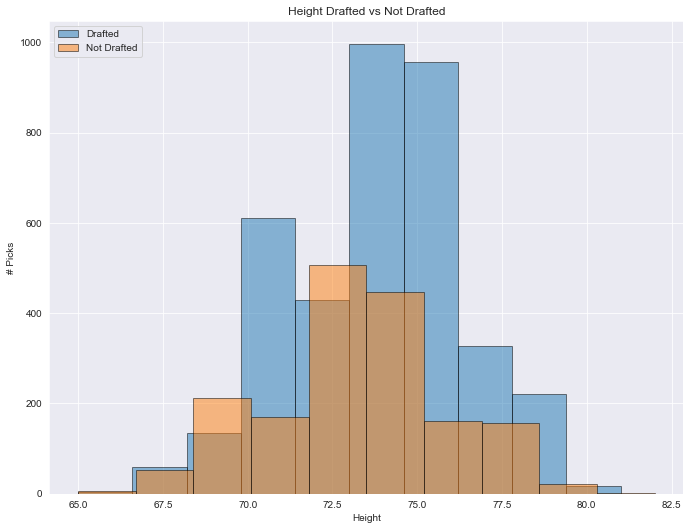

In [6]:
print("Height")
print("-"*40)
print(df.Height.describe())
print("")

print("Average Height Drafted vs Not Drafted")
print("-"*40)
print(df.groupby(['DraftedvNotDrafted']).Height.mean())
print("")

sns.set_style('darkgrid')
fig = plt.figure(figsize = (25,20))
fig.subplots_adjust(hspace = .30)

ax1 = fig.add_subplot(221)
ax1.hist(df[df['DraftedvNotDrafted'] == 'Drafted'].Height, bins = 10, label = 'Drafted', alpha = .50,edgecolor= 'black')
ax1.hist(df[df['DraftedvNotDrafted'] == 'Not Drafted'].Height, bins = 10, label = 'Not Drafted', alpha = .50, edgecolor = 'black')

ax1.set_title('Height Drafted vs Not Drafted')
ax1.set_xlabel('Height')
ax1.set_ylabel('# Picks')
ax1.legend(loc = 'upper left')

plt.show()

In [7]:
df['DoesntLieonDatingApps'] = df['Height'] > 73.5
df['DoesntLieonDatingApps'].head()

0    False
1     True
2     True
3     True
4     True
Name: DoesntLieonDatingApps, dtype: bool

As with Height, Weight was also statistically significant. The average weight for a player not drafted is over 10lbs less than a drafted player. Again, I created a new feature to denote this.

Weight
----------------------------------------
count   5492.00
mean      73.54
std        2.59
min       65.00
25%       72.00
50%       74.00
75%       75.00
max       82.00
Name: Height, dtype: float64

Average Weight Drafted vs Not Drafted
----------------------------------------
DraftedvNotDrafted
Drafted       240.23
Not Drafted   229.53
Name: Weight, dtype: float64



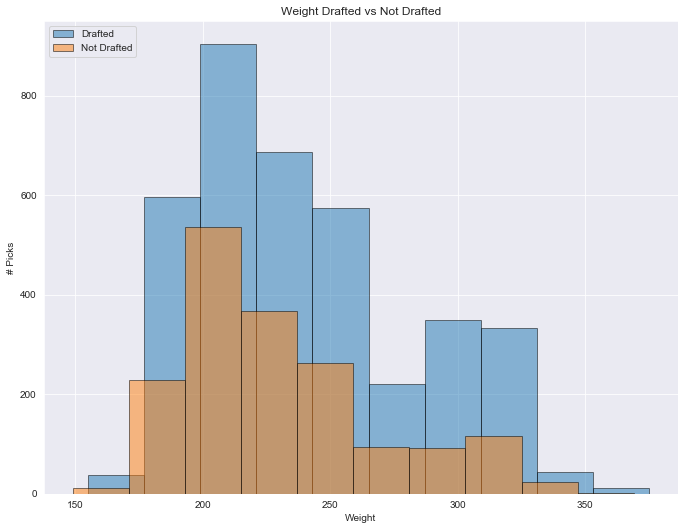

In [22]:
print("Weight")
print("-"*40)
print(df.Height.describe())
print("")

print("Average Weight Drafted vs Not Drafted")
print("-"*40)
print(df.groupby(['DraftedvNotDrafted']).Weight.mean())
print("")

sns.set_style('darkgrid')
fig = plt.figure(figsize = (25,20))
fig.subplots_adjust(hspace = .30)

ax1 = fig.add_subplot(221)
ax1.hist(df[df['DraftedvNotDrafted'] == 'Drafted'].Weight, bins = 10, label = 'Drafted', alpha = .50,edgecolor= 'black')
ax1.hist(df[df['DraftedvNotDrafted'] == 'Not Drafted'].Weight, bins = 10, label = 'Not Drafted', alpha = .50,edgecolor= 'black')

ax1.set_title('Weight Drafted vs Not Drafted')
ax1.set_xlabel('Weight')
ax1.set_ylabel('# Picks')
ax1.legend(loc = 'upper left')

plt.show()

In [9]:
df['SmallestKidontheBlock'] = df['Weight'] < 235
df['SmallestKidontheBlock'].head()

0     True
1    False
2     True
3    False
4     True
Name: SmallestKidontheBlock, dtype: bool

Defense stats are all statistically significant and tackles for a loss is a big difference between those who are drafted compared to those who are not. Driving a competing team's offense back will impede their ability to score so it's understable a team will look for a recruit who can make that happen.

Tackles for a Loss
----------------------------------------
count   5492.00
mean       2.74
std        4.89
min        0.00
25%        0.00
50%        0.00
75%        4.00
max       28.50
Name: Loss, dtype: float64

Average # of Tackles for a Loss Drafted vs Not Drafted
----------------------------------------
DraftedvNotDrafted
Drafted       3.08
Not Drafted   1.99
Name: Loss, dtype: float64



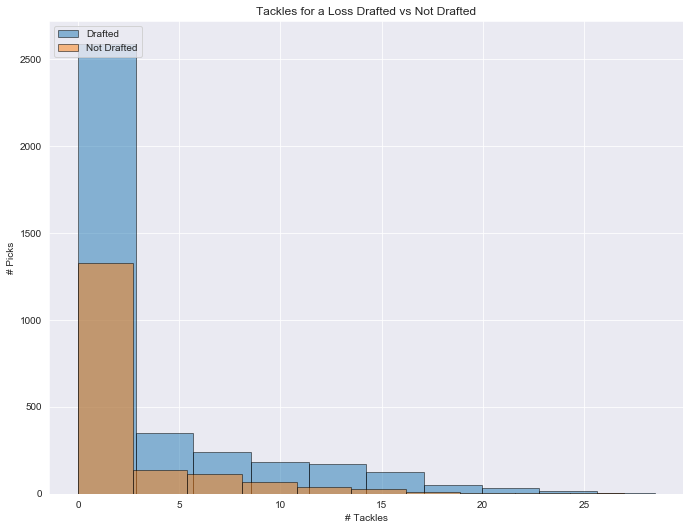

In [10]:
print("Tackles for a Loss")
print("-"*40)
print(df.Loss.describe())
print("")

print("Average # of Tackles for a Loss Drafted vs Not Drafted")
print("-"*40)
print(df.groupby(['DraftedvNotDrafted']).Loss.mean())
print("")

sns.set_style('darkgrid')
fig = plt.figure(figsize = (25,20))
fig.subplots_adjust(hspace = .30)

ax1 = fig.add_subplot(221)
ax1.hist(df[df['DraftedvNotDrafted'] == 'Drafted'].Loss, bins = 10, label = 'Drafted', alpha = .50,edgecolor= 'black')
ax1.hist(df[df['DraftedvNotDrafted'] == 'Not Drafted'].Loss, bins = 10, label = 'Not Drafted', alpha = .50, edgecolor = 'black')

ax1.set_title('Tackles for a Loss Drafted vs Not Drafted')
ax1.set_xlabel('# Tackles')
ax1.set_ylabel('# Picks')
ax1.legend(loc = 'upper left')

plt.show()

In [11]:
df['SendEmBackwards'] = df['Loss'] > 2.5
df['SendEmBackwards'].head()

0    False
1    False
2    False
3    False
4    False
Name: SendEmBackwards, dtype: bool

Just like tackles for a loss, a prospect who can get passed the offensive line and get to the quarterback is a huge asset. Suddenly a team goes from 1 & 10 to 2 & 15 or even further. It takes a special talent to continually get to the quarterback and it makes a huge difference in terms of gameplay when the defense can bring pressure and force a quarterback to get rid of a ball too quickly or hold on to it too long and take a sack.

Sacks
----------------------------------------
count   5492.00
mean       1.12
std        2.52
min        0.00
25%        0.00
50%        0.00
75%        1.00
max       20.00
Name: Sacks, dtype: float64

Average # of Sacks Drafted vs Not Drafted
----------------------------------------
DraftedvNotDrafted
Drafted       1.29
Not Drafted   0.74
Name: Sacks, dtype: float64



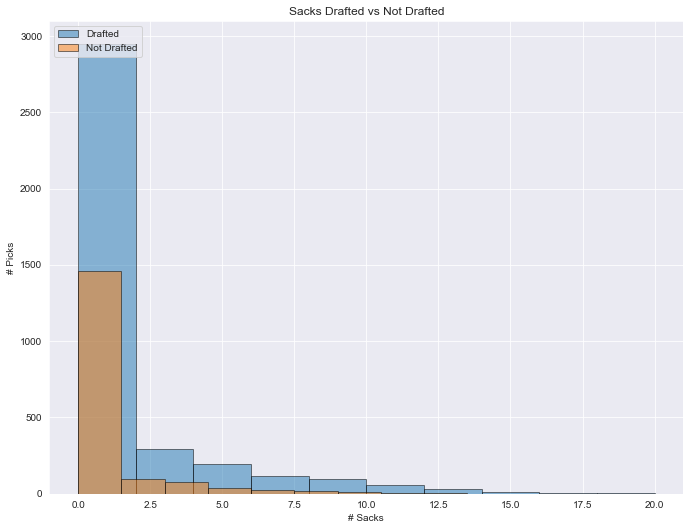

In [23]:
print("Sacks")
print("-"*40)
print(df.Sacks.describe())
print("")

print("Average # of Sacks Drafted vs Not Drafted")
print("-"*40)
print(df.groupby(['DraftedvNotDrafted']).Sacks.mean())
print("")

sns.set_style('darkgrid')
fig = plt.figure(figsize = (25,20))
fig.subplots_adjust(hspace = .30)

ax1 = fig.add_subplot(221)
ax1.hist(df[df['DraftedvNotDrafted'] == 'Drafted'].Sacks, bins = 10, label = 'Drafted', alpha = .50,edgecolor= 'black')
ax1.hist(df[df['DraftedvNotDrafted'] == 'Not Drafted'].Sacks, bins = 10, label = 'Not Drafted', alpha = .50, edgecolor = 'black')

ax1.set_title('Sacks Drafted vs Not Drafted')
ax1.set_xlabel('# Sacks')
ax1.set_ylabel('# Picks')
ax1.legend(loc = 'upper left')

plt.show()

In [24]:
df['CatchTheQB'] = df['Sacks'] > 1
df['CatchTheQB'].head()

0    False
1    False
2    False
3    False
4    False
Name: CatchTheQB, dtype: bool

Kickers and Punters are only drafted 32% of the time according to my data. I want to capture this using the 'TTL_Kicking_Points' column. Higher kicking points, more likely you're not drafted.

Total Kicking Points
----------------------------------------
count   5492.00
mean       1.49
std       12.30
min        0.00
25%        0.00
50%        0.00
75%        0.00
max      156.00
Name: TTL_Kicking_Points, dtype: float64

Average # of Kicking Points Drafted vs Not Drafted
----------------------------------------
DraftedvNotDrafted
Drafted       0.81
Not Drafted   2.96
Name: TTL_Kicking_Points, dtype: float64



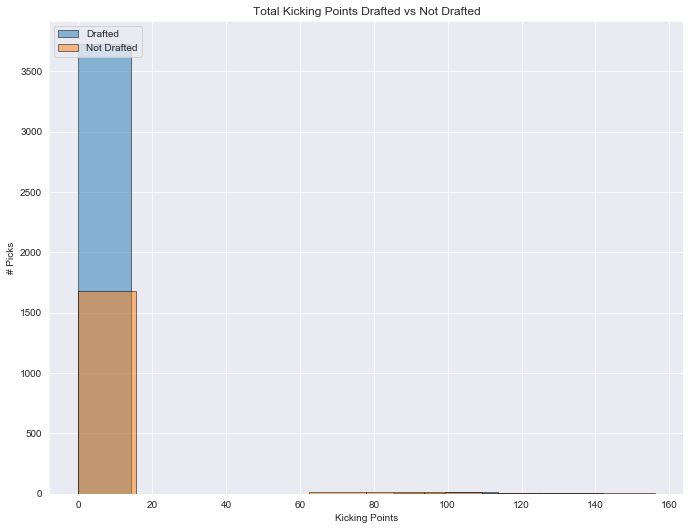

In [25]:
print("Total Kicking Points")
print("-"*40)
print(df.TTL_Kicking_Points.describe())
print("")

print("Average # of Kicking Points Drafted vs Not Drafted")
print("-"*40)
print(df.groupby(['DraftedvNotDrafted']).TTL_Kicking_Points.mean())
print("")

sns.set_style('darkgrid')
fig = plt.figure(figsize = (25,20))
fig.subplots_adjust(hspace = .30)

ax1 = fig.add_subplot(221)
ax1.hist(df[df['DraftedvNotDrafted'] == 'Drafted'].TTL_Kicking_Points, bins = 10, label = 'Drafted', alpha = .50,edgecolor= 'black')
ax1.hist(df[df['DraftedvNotDrafted'] == 'Not Drafted'].TTL_Kicking_Points, bins = 10, label = 'Not Drafted', alpha = .50, edgecolor = 'black')

ax1.set_title('Total Kicking Points Drafted vs Not Drafted')
ax1.set_xlabel('Kicking Points')
ax1.set_ylabel('# Picks')
ax1.legend(loc = 'upper left')

plt.show()

In [26]:
df['NoRespect'] = df['TTL_Kicking_Points'] > 2
df['NoRespect'].head()

0    False
1    False
2    False
3    False
4    False
Name: NoRespect, dtype: bool

In [27]:
df.to_pickle('pickle_files/final_data')